In [1]:
import pandas as pd

data = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json"
dados = pd.read_json(data)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
#verificando os tipos dos dados disponíveis a partir do dado na primeira informação em cada coluna. 
for column in dados.columns:
    print(column, type(dados[column][0]))

customerID <class 'str'>
Churn <class 'str'>
customer <class 'dict'>
phone <class 'dict'>
internet <class 'dict'>
account <class 'dict'>


In [3]:
#verificando as keys dos dicts
for key in ['customer', 'phone', 'internet', 'account']:
    print(dados[key][0].keys())

dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])
dict_keys(['PhoneService', 'MultipleLines'])
dict_keys(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])


In [4]:
normal_customer = pd.json_normalize(data=dados['customer'], sep='_')
normal_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
#separando os dicts

for dict in ['customer', 'phone', 'internet', 'account']:
    dict_normal = pd.json_normalize(data=dados[dict], sep='_')
    dados = pd.concat([dados, dict_normal], axis=1)
    
dados.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
dados.drop(['customer', 'phone', 'internet', 'account'], inplace=True, axis=1)

In [7]:
for column in dados.columns:
    print(column, type(dados[column][0]))

customerID <class 'str'>
Churn <class 'str'>
gender <class 'str'>
SeniorCitizen <class 'numpy.int64'>
Partner <class 'str'>
Dependents <class 'str'>
tenure <class 'numpy.int64'>
PhoneService <class 'str'>
MultipleLines <class 'str'>
InternetService <class 'str'>
OnlineSecurity <class 'str'>
OnlineBackup <class 'str'>
DeviceProtection <class 'str'>
TechSupport <class 'str'>
StreamingTV <class 'str'>
StreamingMovies <class 'str'>
Contract <class 'str'>
PaperlessBilling <class 'str'>
PaymentMethod <class 'str'>
Charges_Monthly <class 'numpy.float64'>
Charges_Total <class 'str'>


In [8]:
strings = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
          'PaperlessBilling', 'PaymentMethod']
for values in strings:
    print(dados[values].value_counts())

Male      3675
Female    3592
Name: gender, dtype: int64
No     3749
Yes    3518
Name: Partner, dtype: int64
No     5086
Yes    2181
Name: Dependents, dtype: int64
Yes    6560
No      707
Name: PhoneService, dtype: int64
No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64
Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64
No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64
No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64
No                     3195
Yes                    2491
No internet service    1581
Name: DeviceProtection, dtype: int64
No                     3582
Yes                    2104
No internet service    1581
Name: TechSupport, dtype: int64
No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV

In [9]:
#11 desses dados não possuem valor.
dados.query("Charges_Total == ' '")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [10]:
#Charges Total não devira ser str, vamos converter em float.
#Existem dados faltantes, vamos utilizar coerce para transformar os erros em NaN.

print(type(dados['Charges_Total'][0]))

dados['Charges_Total'] = pd.to_numeric(dados['Charges_Total'], errors='coerce')

print(type(dados['Charges_Total'][0]))

<class 'str'>
<class 'numpy.float64'>


In [11]:
#Confirmando que somente os 11 vazios foram convertidos em NaN
print(dados['Charges_Total'].isna().sum())

11


In [12]:
#Verificando NaN no dataset
for valor in dados.columns:
    print(valor, dados[valor].isna().sum())

customerID 0
Churn 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
Charges_Monthly 0
Charges_Total 11


In [13]:
#Como é um dataset com mais de 7000 entradas e esses 11 valores parecem não ter sido colocados por erro, 
#iremos tirar esses 11.
print(dados.shape[0])
dados.dropna(inplace=True)
print(dados.shape[0])

7267
7256


Vamos traduzir o dataframe

In [14]:
print(dados.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')


In [15]:
#Começando por renomear as colunas (churn é um termo importado e não será mudado)
dados.rename(columns={'customerID': 'ID_Cliente', 'gender': 'Genero', 'SeniorCitizen': 'E_Idoso',
                     'Partner': 'Tem_Parceiro', 'Dependents': 'Tem_Dependentes', 'tenure': 'Tempo_de_Posse',
                     'PhoneService': 'Tem_Servico_Telefone', 'MultipleLines': 'Tem_Multiplas_Linhas',
                     'InternetService': 'Tem_Servico_Internet', 'OnlineSecurity': 'Tem_Servico_Seguranca_Online',
                     'OnlineBackup': 'Tem_Backup_Online', 'DeviceProtection': 'Tem_Protecao_Aparelho',
                     'TechSupport': 'Tem_Suporte_Tecnico', 'StreamingTV': 'Tem_Tv_Streaming', 'StreamingMovies': 'Tem_Filmes_Streaming',
                     'Contract': 'Contrato', 'PaperlessBilling': 'Cobranca_Sem_Papel', 'PaymentMethod': 'Metodo_de_Pagamento',
                     'Charges_Monthly': 'Cobra_Mensalmente', 'Charges_Total': 'Cobranca_Total'}, inplace=True)
print(dados.columns)

Index(['ID_Cliente', 'Churn', 'Genero', 'E_Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Tempo_de_Posse', 'Tem_Servico_Telefone',
       'Tem_Multiplas_Linhas', 'Tem_Servico_Internet',
       'Tem_Servico_Seguranca_Online', 'Tem_Backup_Online',
       'Tem_Protecao_Aparelho', 'Tem_Suporte_Tecnico', 'Tem_Tv_Streaming',
       'Tem_Filmes_Streaming', 'Contrato', 'Cobranca_Sem_Papel',
       'Metodo_de_Pagamento', 'Cobra_Mensalmente', 'Cobranca_Total'],
      dtype='object')


In [16]:
#Traduzir resultados 
dados.replace('Yes', 1, inplace=True)
dados.replace('No', 0, inplace=True)
dados.replace('Female', 0, inplace=True)
dados.replace('Male', 1, inplace=True)
dados.replace('Fiber optic', 1, inplace=True)
dados.replace('DSL', 2, inplace=True)
dados.replace('No phone service', 999, inplace=True)
dados.replace('No internet service', 999, inplace=True)
dados.replace('Month-to-month', 0, inplace=True)
dados.replace('Two year', 2, inplace=True)
dados.replace('One year', 1, inplace=True)
dados.replace('Electronic check', 0, inplace=True)
dados.replace('Mailed check', 1, inplace=True)
dados.replace('Bank transfer (automatic)', 2, inplace=True)
dados.replace('Credit card (automatic)', 3, inplace=True)

In [17]:
#Vamos criar uma coluna com os gastos diários de cada indivíduo baseando-se no gasto mensal
dados['Gastos_Diarios'] = (dados['Cobra_Mensalmente']/30).round(2)
dados['Gastos_Diarios']

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7262    1.84
7263    2.84
7264    1.68
7265    2.26
7266    1.97
Name: Gastos_Diarios, Length: 7256, dtype: float64

__Vamos começar a avaliar o Churn__

In [18]:
dados.Churn.value_counts() #existem 224 sem o dado de Churn


0    5163
1    1869
      224
Name: Churn, dtype: int64

In [19]:
tirar = dados.query('Churn != 0 & Churn !=1').index
dados.drop(labels=tirar, axis=0, inplace=True)
dados.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('rocket_r')
sns.set_style('darkgrid')

[Text(0, 0, '1869'), Text(0, 0, '5163')]

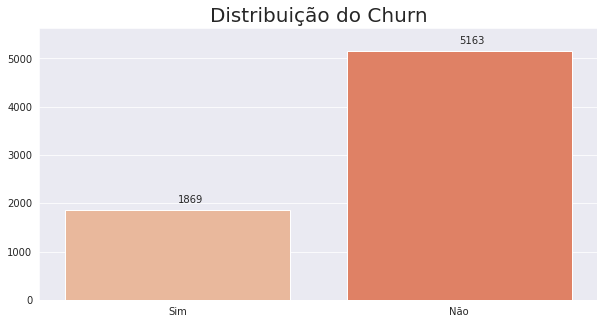

In [21]:
Sim = len(dados.query('Churn == 1')['Churn'])
Nao = len(dados.query('Churn == 0')['Churn'])
Categoria = ['Sim', 'Não']

plt.figure(figsize=(10,5))

ax = sns.barplot(x=Categoria, y=[Sim, Nao])
plt.title('Distribuição do Churn', fontsize=20)
bars = ax.barh([Sim+200, Nao+200], width=[0,1], linewidth=0)
ax.bar_label(bars, [Sim, Nao])


<AxesSubplot:title={'center':'Churn por gênero'}, xlabel='Gênero', ylabel='Churn'>

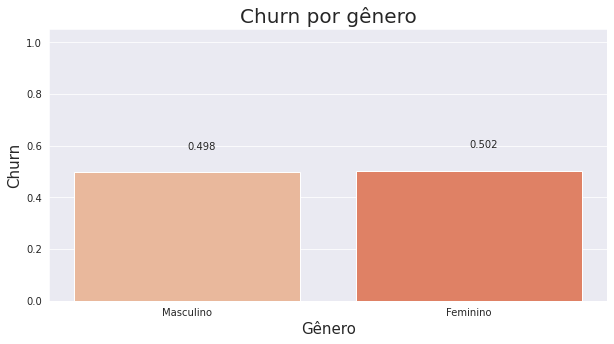

In [22]:
Feminino = len(dados.query('Churn == 1 & Genero == 0')['Churn'])
Masculino = len(dados.query('Churn == 1 & Genero == 1')['Churn'])
Total = len(dados.query('Churn == 1')['Churn'])
Feminino = round(Feminino/Total, 3)
Masculino = round(Masculino/Total, 3)
Categoria = ['Masculino', 'Feminino']

plt.figure(figsize=(10,5))
ax = sns.barplot(x=Categoria, y=[Masculino, Feminino])
plt.title('Churn por gênero', fontsize=20)
ax.set_xlabel('Gênero', fontsize=15)
ax.set_ylabel('Churn', fontsize=15)
ax.set_xticklabels(['Masculino', 'Feminino'])
bars = ax.barh([Masculino+0.1, Feminino+0.1], width=[0,1], linewidth=0, alpha=0)
ax.bar_label(bars, [Masculino, Feminino])

ax

In [23]:
def churnporsimnao(cat):
    Nao = len(dados.query('Churn == 1 & {} == 0'.format(cat))['Churn'])
    Sim = len(dados.query('Churn == 1 & {} == 1'.format(cat))['Churn'])
    total = len(dados.query('Churn == 1')['Churn'])
    Nao = round(Nao/total, 3)
    Sim = round(Sim/total, 3)
    Categoria = ['Nao', 'Sim']

    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=Categoria, y=[Nao, Sim])
    plt.title('Churn na categoria {}'.format(cat), fontsize=20)
    ax.set_xlabel('{}'.format(cat), fontsize=15)
    ax.set_ylabel('Churn', fontsize=15)
    ax.set_xticklabels(['Não', 'Sim'])
    bars = ax.barh([Nao+0.1, Sim+0.1], width=[0,1], linewidth=0, alpha=0)
    ax.bar_label(bars, [Nao, Sim])

    return ax

<AxesSubplot:title={'center':'Churn na categoria E_Idoso'}, xlabel='E_Idoso', ylabel='Churn'>

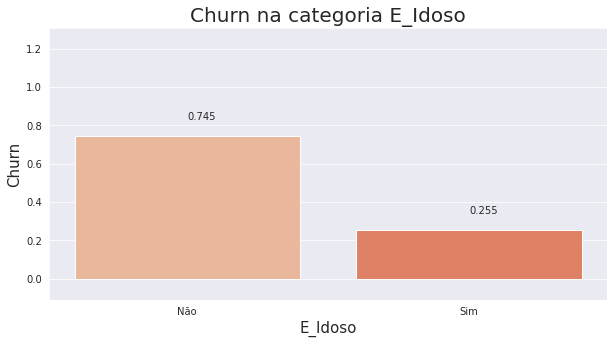

In [24]:
churnporsimnao('E_Idoso')

<AxesSubplot:title={'center':'Churn na categoria Tem_Parceiro'}, xlabel='Tem_Parceiro', ylabel='Churn'>

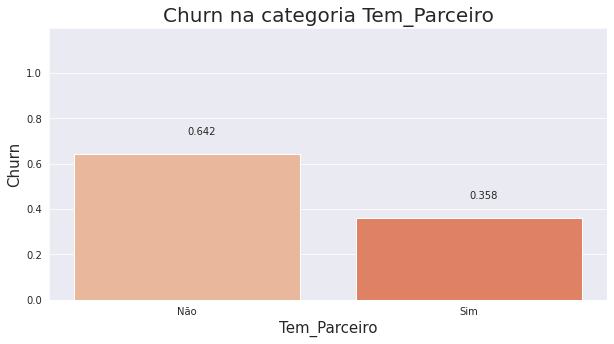

In [25]:
churnporsimnao('Tem_Parceiro')

<AxesSubplot:title={'center':'Churn na categoria Tem_Dependentes'}, xlabel='Tem_Dependentes', ylabel='Churn'>

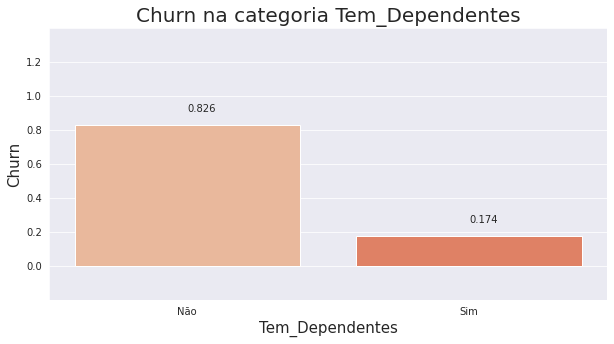

In [26]:
churnporsimnao('Tem_Dependentes')

<AxesSubplot:title={'center':'Churn na categoria Tem_Servico_Telefone'}, xlabel='Tem_Servico_Telefone', ylabel='Churn'>

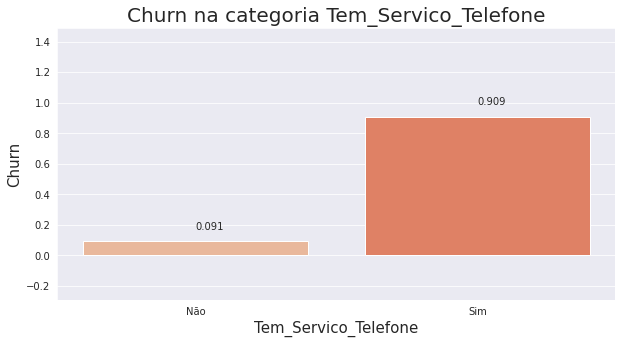

In [27]:
churnporsimnao('Tem_Servico_Telefone')

<AxesSubplot:title={'center':'Churn na categoria Tem_Servico_Internet'}, xlabel='Tem_Servico_Internet', ylabel='Churn'>

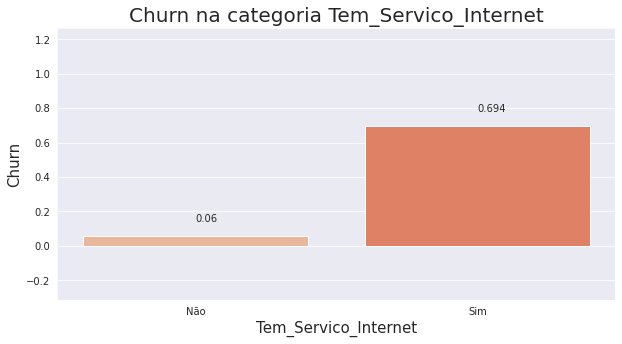

In [28]:
churnporsimnao('Tem_Servico_Internet')

In [29]:
def churnpornaopossuiservico(cat):
    Nao = len(dados.query('Churn == 1 & {} == 0'.format(cat))['Churn'])
    Sim = len(dados.query('Churn == 1 & {} == 1'.format(cat))['Churn'])
    Nao_Servico = len(dados.query('Churn == 1 & {} == 999'.format(cat))['Churn'])
    total = len(dados.query('Churn == 1')['Churn'])
    Nao = round(Nao/total, 3)
    Sim = round(Sim/total, 3)
    Nao_Servico = round(Nao_Servico/total, 3)
    Categoria = ['Nao', 'Sim', 'Nao_Servico']

    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=Categoria, y=[Nao, Sim, Nao_Servico])
    plt.title('Churn na categoria {}'.format(cat), fontsize=20)
    ax.set_xlabel('{}'.format(cat), fontsize=15)
    ax.set_ylabel('Churn', fontsize=15)
    ax.set_xticklabels(['Não', 'Sim', 'Não Possui o Serviço'])
    bars = ax.barh([Nao+0.1, Sim+0.1, Nao_Servico+0.1], width=[0,1,2], linewidth=0, alpha=0)
    ax.bar_label(bars, [Nao, Sim, Nao_Servico])

    return ax

<AxesSubplot:title={'center':'Churn na categoria Tem_Multiplas_Linhas'}, xlabel='Tem_Multiplas_Linhas', ylabel='Churn'>

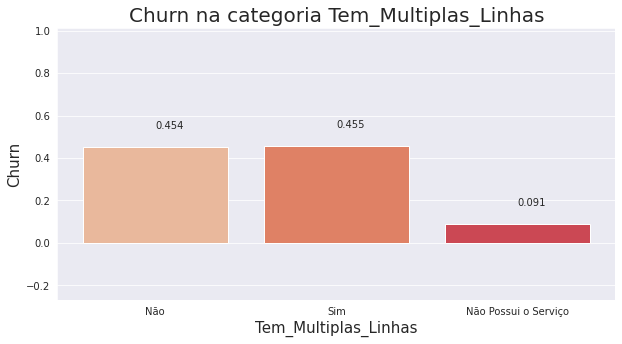

In [30]:
churnpornaopossuiservico('Tem_Multiplas_Linhas')

<AxesSubplot:title={'center':'Churn na categoria Tem_Servico_Seguranca_Online'}, xlabel='Tem_Servico_Seguranca_Online', ylabel='Churn'>

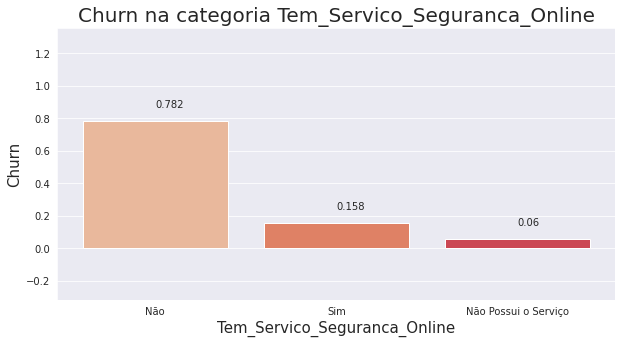

In [31]:
churnpornaopossuiservico('Tem_Servico_Seguranca_Online')

<AxesSubplot:title={'center':'Churn na categoria Tem_Backup_Online'}, xlabel='Tem_Backup_Online', ylabel='Churn'>

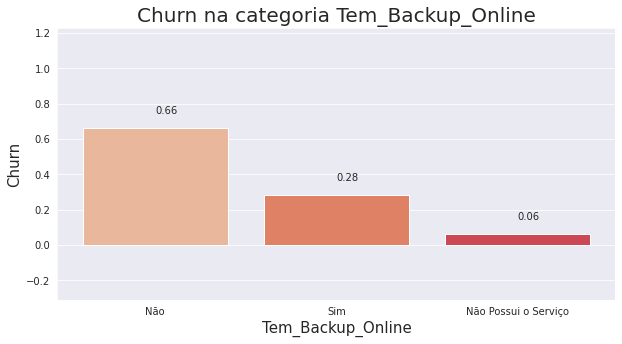

In [32]:
churnpornaopossuiservico('Tem_Backup_Online')

<AxesSubplot:title={'center':'Churn na categoria Tem_Protecao_Aparelho'}, xlabel='Tem_Protecao_Aparelho', ylabel='Churn'>

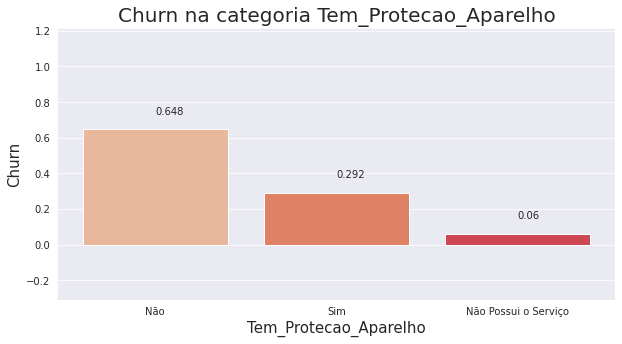

In [33]:
churnpornaopossuiservico('Tem_Protecao_Aparelho')

<AxesSubplot:title={'center':'Churn na categoria Tem_Suporte_Tecnico'}, xlabel='Tem_Suporte_Tecnico', ylabel='Churn'>

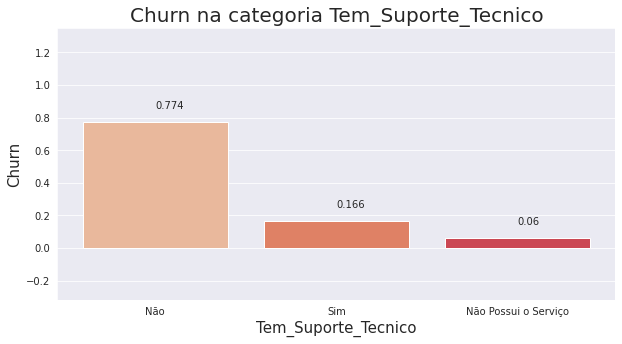

In [34]:
churnpornaopossuiservico('Tem_Suporte_Tecnico')

<AxesSubplot:title={'center':'Churn na categoria Tem_Tv_Streaming'}, xlabel='Tem_Tv_Streaming', ylabel='Churn'>

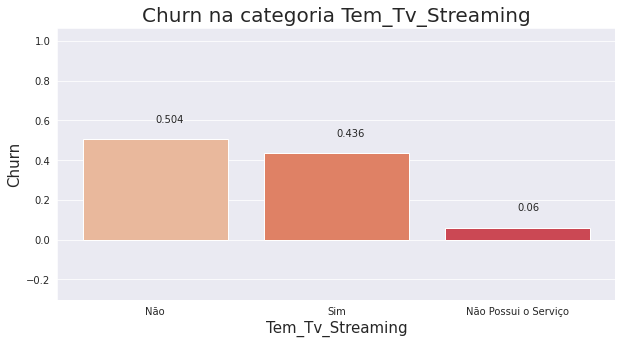

In [35]:
churnpornaopossuiservico('Tem_Tv_Streaming')

<AxesSubplot:title={'center':'Churn por tipo de contrato'}, xlabel='Tipo de contrato', ylabel='Churn'>

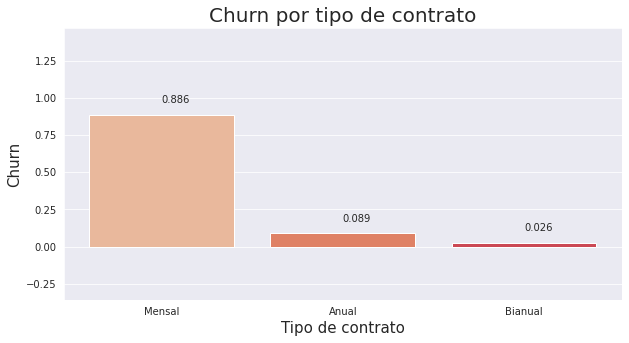

In [36]:
Mensal = len(dados.query('Churn == 1 & Contrato == 0')['Churn'])
Anual = len(dados.query('Churn == 1 & Contrato == 1')['Churn'])
Bianual = len(dados.query('Churn == 1 & Contrato == 2')['Churn'])
total = len(dados.query('Churn == 1')['Churn'])
Mensal = round(Mensal/total, 3)
Anual = round(Anual/total, 3)
Bianual = round(Bianual/total, 3)
Categoria = ['Mensal', 'Anual', 'Bianual']

plt.figure(figsize=(10,5))
ax = sns.barplot(x=Categoria, y=[Mensal, Anual, Bianual])
plt.title('Churn por tipo de contrato', fontsize=20)
ax.set_xlabel('Tipo de contrato', fontsize=15)
ax.set_ylabel('Churn', fontsize=15)
ax.set_xticklabels(['Mensal', 'Anual', 'Bianual'])
bars = ax.barh([Mensal+0.1, Anual+0.1, Bianual+0.1], width=[0,1,2], linewidth=0, alpha=0)
ax.bar_label(bars, [Mensal, Anual, Bianual])

ax

<AxesSubplot:title={'center':'Churn na categoria Cobranca_Sem_Papel'}, xlabel='Cobranca_Sem_Papel', ylabel='Churn'>

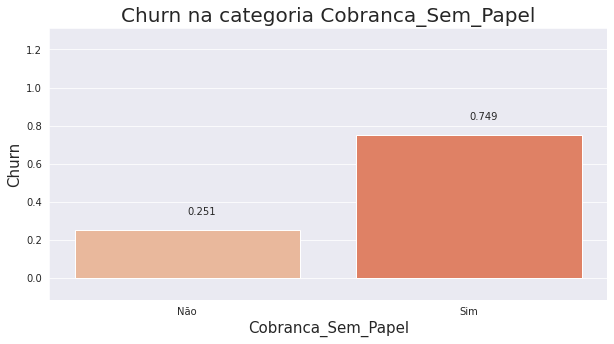

In [37]:
churnporsimnao('Cobranca_Sem_Papel')

<AxesSubplot:title={'center':'Churn por tipo de pagamento'}, xlabel='Tipo de pagamento', ylabel='Churn'>

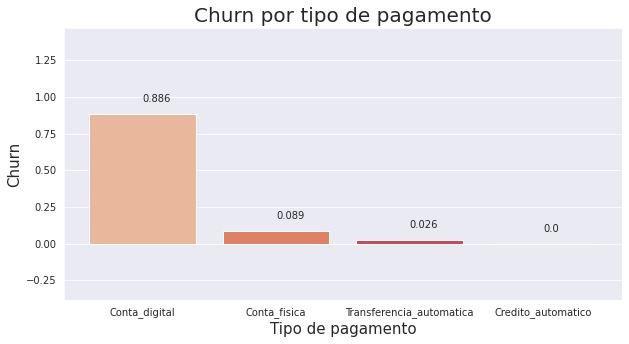

In [38]:
Conta_digital = len(dados.query('Churn == 1 & Contrato == 0')['Churn'])
Conta_fisica = len(dados.query('Churn == 1 & Contrato == 1')['Churn'])
Transferencia_automatica = len(dados.query('Churn == 1 & Contrato == 2')['Churn'])
Credito_automatico = len(dados.query('Churn == 1 & Contrato == 3')['Churn'])
total = len(dados.query('Churn == 1')['Churn'])
Conta_digital = round(Conta_digital/total, 3)
Conta_fisica = round(Conta_fisica/total, 3)
Transferencia_automatica = round(Transferencia_automatica/total, 3)
Credito_automatico = round(Credito_automatico/total, 3)
Categoria = ['Conta_digital', 'Conta_fisica', 'Transferencia_automatica', 'Credito_automatico']

plt.figure(figsize=(10,5))
ax = sns.barplot(x=Categoria, y=[Conta_digital, Conta_fisica, Transferencia_automatica, Credito_automatico])
plt.title('Churn por tipo de pagamento', fontsize=20)
ax.set_xlabel('Tipo de pagamento', fontsize=15)
ax.set_ylabel('Churn', fontsize=15)
ax.set_xticklabels(['Conta_digital', 'Conta_fisica', 'Transferencia_automatica', 'Credito_automatico'])
bars = ax.barh([Conta_digital+0.1, Conta_fisica+0.1, Transferencia_automatica+0.1, Credito_automatico+0.1],
               width=[0,1,2,3], linewidth=0, alpha=0)
ax.bar_label(bars, [Conta_digital, Conta_fisica, Transferencia_automatica, Credito_automatico])

ax

Text(0.5, 1.0, 'Distribuição em caixa do tempo de conta')

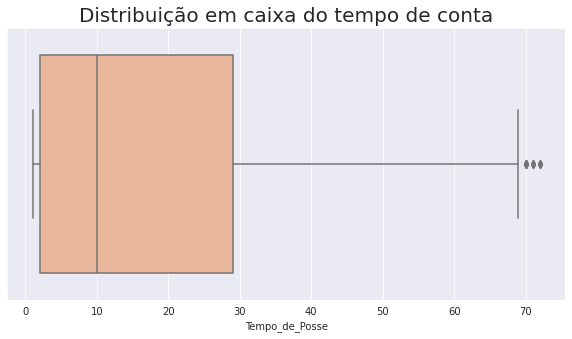

In [39]:
tempo_conta = dados.query('Churn == 1')['Tempo_de_Posse']
Cobra_Mensalmente = dados.query('Churn == 1')['Cobra_Mensalmente']
Cobranca_Total = dados.query('Churn == 1')['Cobranca_Total']

plt.figure(figsize=(10,5))
ax = sns.boxplot(x = tempo_conta)
ax.set_title('Distribuição em caixa do tempo de conta', fontsize=20)





Text(0.5, 1.0, 'Distribuição em caixa da cobrança mensal')

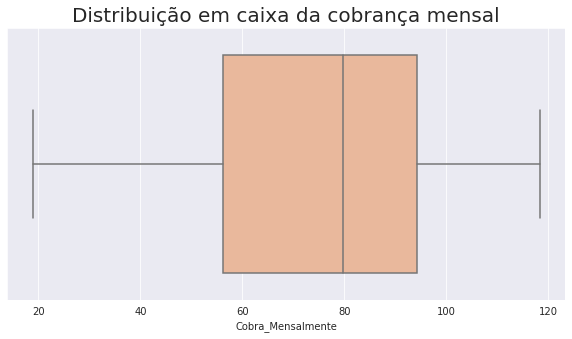

In [40]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x = Cobra_Mensalmente)
ax.set_title('Distribuição em caixa da cobrança mensal', fontsize=20)

Text(0.5, 1.0, 'Distribuição em caixa da cobrança total')

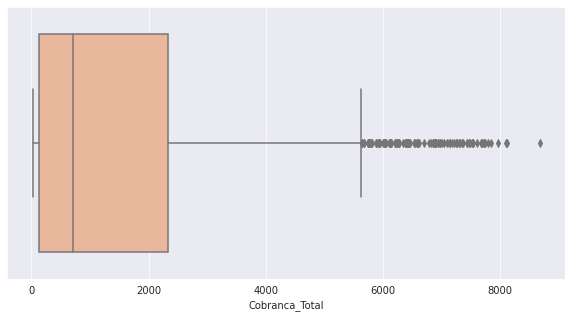

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot (x = Cobranca_Total)
ax.set_title('Distribuição em caixa da cobrança total', fontsize=20)

In [42]:
#Os dados são muito grandes, vou fazer uma amostra para realizar o pairplot
dados_reduzidos = dados.sample(frac=0.1, weights=dados['Churn'])
print(dados_reduzidos.shape, dados.shape)

(703, 22) (7032, 22)


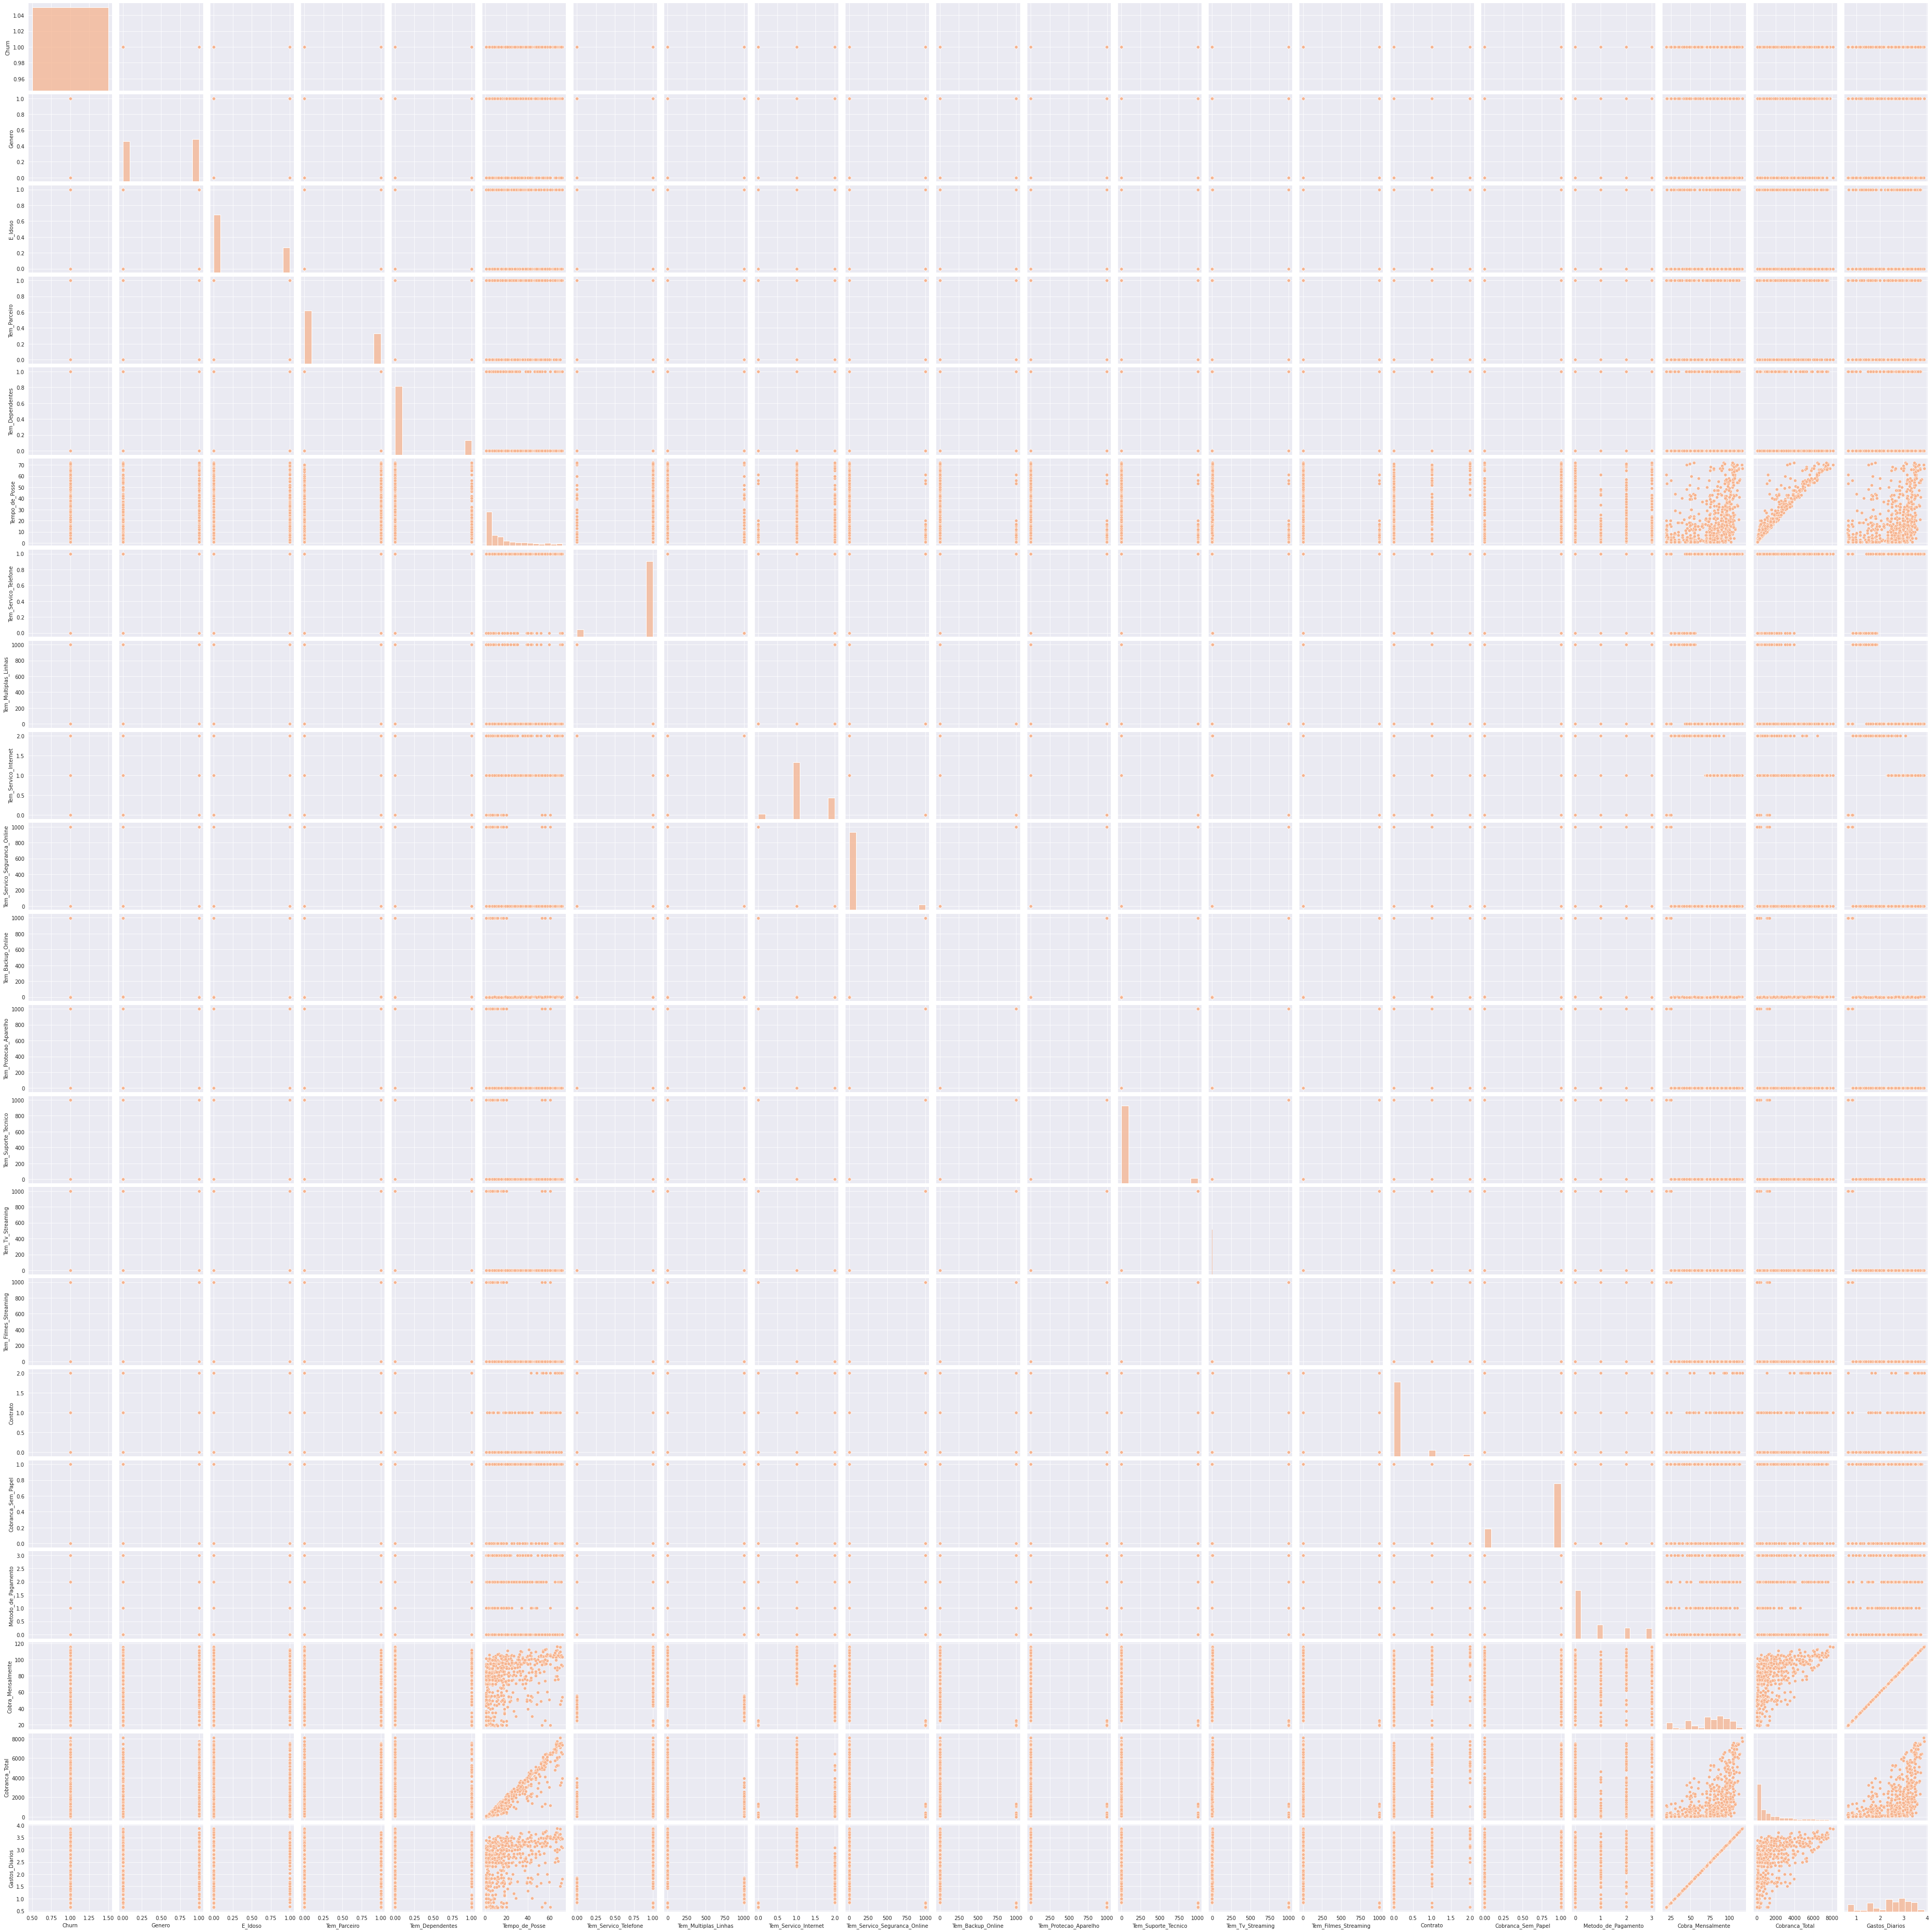

In [43]:
#A visualização do pairplot não ficou boa, mas é possível ver indícios de algumas covariancias. 
ax = sns.pairplot(dados_reduzidos)
ax

In [44]:
dados.cov()

,Genero,E_Idoso,Tem_Parceiro,Tem_Dependentes,Tempo_de_Posse,Tem_Servico_Telefone,Tem_Multiplas_Linhas,Tem_Servico_Internet,Tem_Servico_Seguranca_Online,Tem_Backup_Online,Tem_Protecao_Aparelho,Tem_Suporte_Tecnico,Tem_Tv_Streaming,Tem_Filmes_Streaming,Contrato,Cobranca_Sem_Papel,Metodo_de_Pagamento,Cobra_Mensalmente,Cobranca_Total,Gastos_Diarios
Genero,0.250014,-0.000336,-0.000345,0.002368,0.064867,-0.001111,1.107331,0.000824,0.971991,0.972571,0.975491,0.973753,0.973950,0.973220,0.000039,-0.002924,-0.002832,-0.207288,5.422208e-02,-0.006935
E_Idoso,-0.000336,0.136046,0.003125,-0.035540,0.141988,0.000915,-0.887885,0.008745,-27.691520,-27.673398,-27.674659,-27.695227,-27.666166,-27.663541,-0.043570,0.028320,-0.039734,2.439951,8.562397e+01,0.081329
Tem_Parceiro,-0.000345,0.003125,0.249730,0.103430,4.684523,0.002717,-2.679462,-0.000189,-0.026285,-0.024981,-0.022225,-0.031414,-0.028414,-0.029909,0.122414,-0.003427,0.076563,1.470784,3.614364e+02,0.049060
Tem_Dependentes,0.002368,-0.035540,0.103430,0.209425,1.835254,-0.000146,0.140147,-0.014856,26.059662,26.048088,26.045967,26.056041,26.039272,26.034386,0.091694,-0.024764,0.065232,-1.546763,6.706746e+01,-0.051587
Tempo_de_Posse,0.064867,0.141988,4.684523,1.835254,602.469774,0.057149,-53.062180,0.539906,-375.171339,-374.601425,-374.599867,-375.191471,-375.468479,-375.400610,13.835544,0.058170,9.619692,182.299526,4.595074e+04,6.077492
Tem_Servico_Telefone,-0.001111,0.000915,0.002717,-0.000146,0.057149,0.087362,-87.234007,-0.084391,20.872149,20.877076,20.874562,20.871639,20.881327,20.879578,0.000743,0.002425,-0.001055,2.205644,7.571460e+01,0.073517
Tem_Multiplas_Linhas,1.107331,-0.887885,-2.679462,0.140147,-53.062180,-87.234007,87106.251207,84.302899,-20894.069150,-20898.966557,-20896.455082,-20893.559642,-20903.197995,-20901.450978,-0.698195,-2.382658,1.074848,-2196.143432,-7.511376e+04,-73.199939
Tem_Servico_Internet,0.000824,0.008745,-0.000189,-0.014856,0.539906,-0.084391,84.302899,0.543569,-243.356806,-243.377605,-243.380465,-243.357543,-243.400991,-243.397658,-0.061151,0.050053,-0.007501,7.146282,2.936195e+02,0.238225
Tem_Servico_Seguranca_Online,0.971991,-27.691520,-0.026285,26.059662,-375.171339,20.872149,-20894.069150,-243.356806,168993.646799,168980.911157,168981.124296,168992.747265,168972.350842,168971.493595,82.839852,-64.782147,55.832097,-9438.559730,-3.490327e+05,-314.649813
Tem_Backup_Online,0.972571,-27.673398,-0.024981,26.048088,-374.601425,20.877076,-20898.966557,-243.377605,168980.911157,168968.484163,168968.541620,168980.145820,168959.785287,168958.923826,82.808802,-64.751570,55.800042,-9436.278158,-3.489060e+05,-314.573761


In [45]:
#Vou normalizar os dados para verificar melhor a covariancia
from sklearn import preprocessing
dados_sem_id = dados.drop('ID_Cliente', axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X_ajustado = min_max_scaler.fit_transform(dados_sem_id)
dados_ajustados = pd.DataFrame(X_ajustado)

In [46]:
dados_ajustados_cov = dados_ajustados.cov()
dados_ajustados_cov

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.195171,-0.001887,0.024530,-0.033112,-0.032980,-0.054073,0.001527,-0.001518,0.007670,-0.041421,...,-0.041401,-0.041420,-0.041374,-0.041374,-0.072887,0.041560,-0.044507,0.025506,-0.023052,0.025516
1,-0.001887,0.250014,-0.000336,-0.000345,0.002368,0.000914,-0.001111,0.001108,0.000412,0.000973,...,0.000976,0.000975,0.000975,0.000974,0.000020,-0.002924,-0.000944,-0.002063,0.000006,-0.002070
2,0.024530,-0.000336,0.136046,0.003125,-0.035540,0.002000,0.000915,-0.000889,0.004373,-0.027719,...,-0.027702,-0.027723,-0.027694,-0.027691,-0.021785,0.028320,-0.013245,0.024278,0.009880,0.024277
3,-0.033112,-0.000345,0.003125,0.249730,0.103430,0.065979,0.002717,-0.002682,-0.000094,-0.000026,...,-0.000022,-0.000031,-0.000028,-0.000030,0.061207,-0.003427,0.025521,0.014635,0.041707,0.014645
4,-0.032980,0.002368,-0.035540,0.103430,0.209425,0.025849,-0.000146,0.000140,-0.007428,0.026086,...,0.026072,0.026082,0.026065,0.026060,0.045847,-0.024764,0.021744,-0.015391,0.007739,-0.015399
5,-0.054073,0.000914,0.002000,0.065979,0.025849,0.119514,0.000805,-0.000748,0.003802,-0.005289,...,-0.005281,-0.005290,-0.005294,-0.005293,0.097433,0.000819,0.045163,0.025548,0.074682,0.025552
6,0.001527,-0.001111,0.000915,0.002717,-0.000146,0.000805,0.087362,-0.087321,-0.042196,0.020893,...,0.020895,0.020893,0.020902,0.020900,0.000372,0.002425,-0.000352,0.021947,0.008737,0.021945
7,-0.001518,0.001108,-0.000889,-0.002682,0.000140,-0.000748,-0.087321,0.087281,0.042194,-0.020936,...,-0.020938,-0.020935,-0.020945,-0.020943,-0.000349,-0.002385,0.000359,-0.021874,-0.008676,-0.021873
8,0.007670,0.000412,0.004373,-0.000094,-0.007428,0.003802,-0.042196,0.042194,0.135892,-0.121800,...,-0.121812,-0.121801,-0.121822,-0.121821,-0.015288,0.025027,-0.001250,0.035554,0.016941,0.035556
9,-0.041421,0.000973,-0.027719,-0.000026,0.026086,-0.005289,0.020893,-0.020936,-0.121800,0.169332,...,0.169320,0.169331,0.169311,0.169310,0.041461,-0.064847,0.018629,-0.094010,-0.040316,-0.094019


<AxesSubplot:>

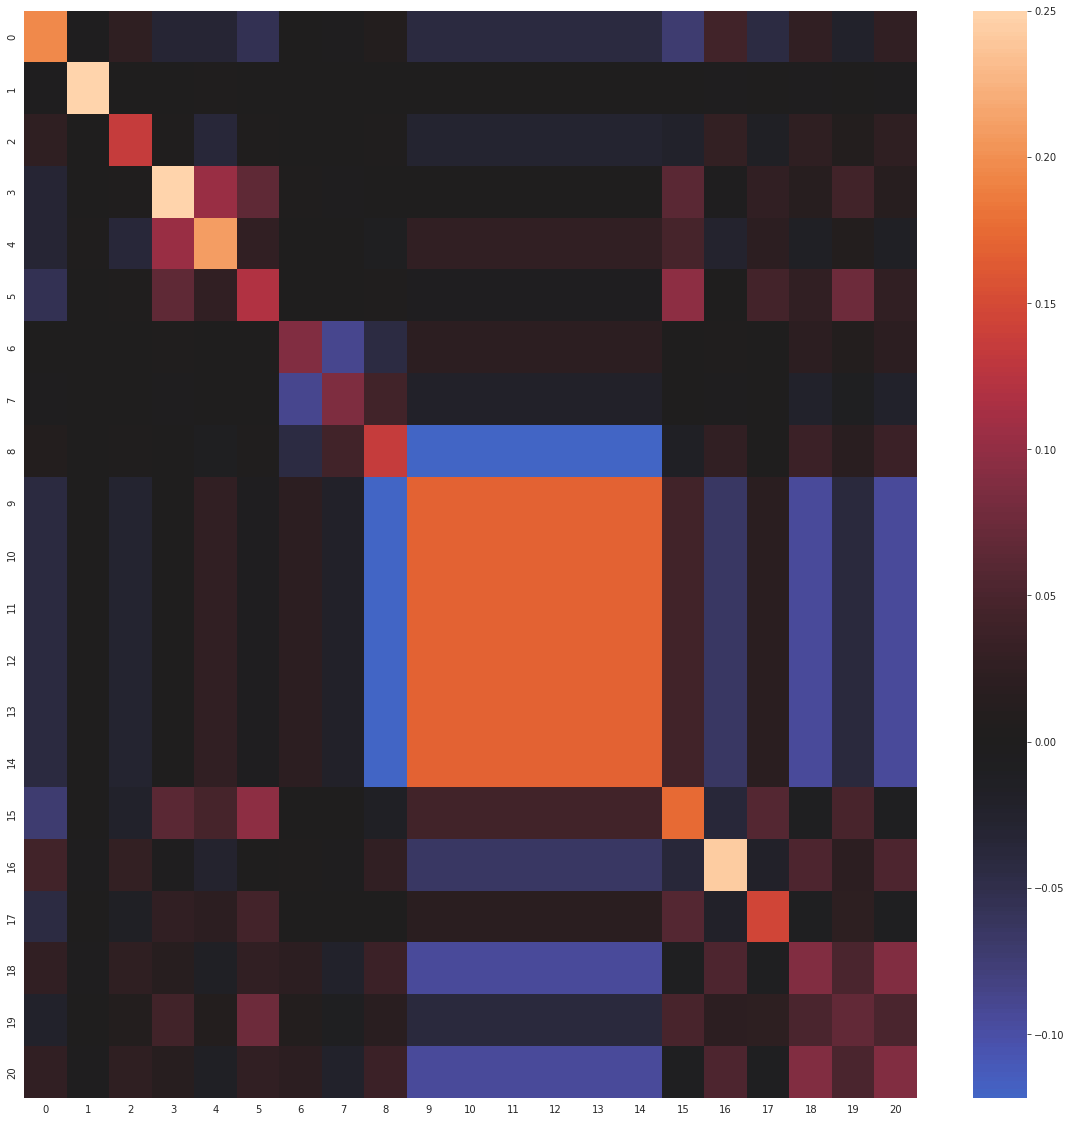

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(dados_ajustados_cov, center=0)

In [48]:
#As colunas entre a 8 e a 14 parecem estar com uma covariancia significativa entre elas.
#A coluna 8 parece negativa, mas forte. 
dados_sem_id.iloc[:, 8:14]

,Tem_Servico_Internet,Tem_Servico_Seguranca_Online,Tem_Backup_Online,Tem_Protecao_Aparelho,Tem_Suporte_Tecnico,Tem_Tv_Streaming
0,2,0,1,0,1,1
1,2,0,0,0,0,0
2,1,0,0,1,0,0
3,1,0,1,1,0,1
4,1,0,0,0,1,1
...,...,...,...,...,...,...
7262,2,1,0,0,1,0
7263,1,0,0,0,0,0
7264,2,0,1,0,0,0
7265,2,1,0,1,1,0


As colunas de serviços que dependem de ter internet apresentaram covariancia significativa entre elas. É preciso atenção na hora de modelar. 